

               Microsoft Power BI Para Data Science, Versão 2.0

                               Data Science Academy

                                   Mini-Projeto 3
       
         Prevendo a Inadimplência de Clientes com Machine Learning e Power BI


O projeto original foi desenvolvido em linguagem R.

Aqui, iremos utilizar linguagem Python.

O link dos dados é: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
# Carregando os pacotes

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [3]:
# Carregando os dados

dados_clientes = pd.read_csv('/content/drive/MyDrive/Data science academy/Curso Power BI para data science/dataset.csv')

In [4]:
# Visualizando os dados e sua estrutura

dados_clientes.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
dados_clientes.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#Análise Exploratória, Limpeza e Transformação

In [7]:
# Removendo a primeira coluna ID

dados_clientes.drop('ID', axis=1, inplace=True)

In [8]:
# Renomeando a coluna de classe (Target)

dados_clientes.rename({'default payment next month': 'inadimplente'}, axis=1, inplace=True)

In [9]:
# Verificando valores ausentes e removendo do dataset.

dados_clientes.isnull().sum()

LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
inadimplente    0
dtype: int64

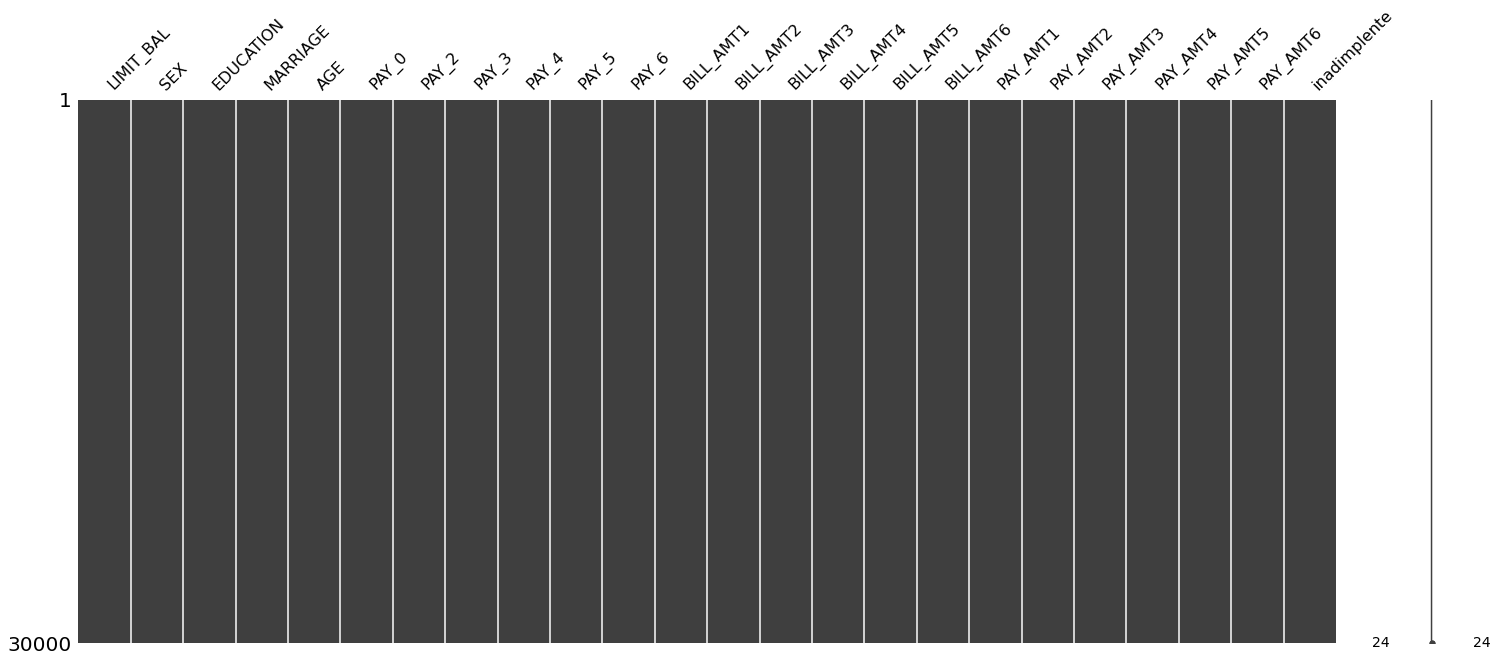

In [10]:
msno.matrix(dados_clientes)

Não há valores nulos.

In [11]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LIMIT_BAL     30000 non-null  int64
 1   SEX           30000 non-null  int64
 2   EDUCATION     30000 non-null  int64
 3   MARRIAGE      30000 non-null  int64
 4   AGE           30000 non-null  int64
 5   PAY_0         30000 non-null  int64
 6   PAY_2         30000 non-null  int64
 7   PAY_3         30000 non-null  int64
 8   PAY_4         30000 non-null  int64
 9   PAY_5         30000 non-null  int64
 10  PAY_6         30000 non-null  int64
 11  BILL_AMT1     30000 non-null  int64
 12  BILL_AMT2     30000 non-null  int64
 13  BILL_AMT3     30000 non-null  int64
 14  BILL_AMT4     30000 non-null  int64
 15  BILL_AMT5     30000 non-null  int64
 16  BILL_AMT6     30000 non-null  int64
 17  PAY_AMT1      30000 non-null  int64
 18  PAY_AMT2      30000 non-null  int64
 19  PAY_AMT3      30000 non-n

In [12]:
# Convertendo os atributos genero, escolaridade, estado civil e idade para fatores (categorias)
# Renomeando colunas categóricas

lista_de_nomes = ['Genero', 'Escolaridade', 'Estado_Civil', 'Idade']
for i in range(0,4):
  dados_clientes.rename(columns={ dados_clientes.columns[i+1] : lista_de_nomes[i] }, inplace = True)

In [13]:
dados_clientes.head()

,LIMIT_BAL,Genero,Escolaridade,Estado_Civil,Idade,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,inadimplente
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
# Genero

dados_clientes.Genero.value_counts()

2    18112
1    11888
Name: Genero, dtype: int64

In [15]:
dados_clientes.Genero.describe()

count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Genero, dtype: float64

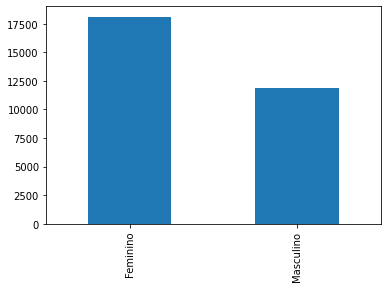

In [16]:
dic_temp = {1: "Masculino", 2: "Feminino"}
dados_clientes.replace({"Genero": dic_temp}).Genero.value_counts().plot.bar()

In [17]:
# Escolaridade

dados_clientes.Escolaridade.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Escolaridade, dtype: int64

In [18]:
dados_clientes.Escolaridade.describe()

count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: Escolaridade, dtype: float64

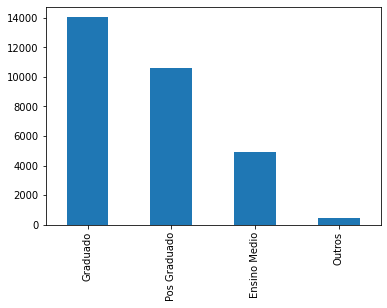

In [19]:
dic_temp = {1 : 'Pos Graduado', 2: "Graduado", 3 : 'Ensino Medio', 4 : 'Outros', 5 : 'Outros', 6 : 'Outros', 0 : 'Outros'}
dados_clientes.replace({"Escolaridade": dic_temp}).Escolaridade.value_counts().plot.bar()

In [20]:
# Estado Civil

dados_clientes.Estado_Civil.value_counts()

2    15964
1    13659
3      323
0       54
Name: Estado_Civil, dtype: int64

In [21]:
dados_clientes.Estado_Civil.describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Estado_Civil, dtype: float64

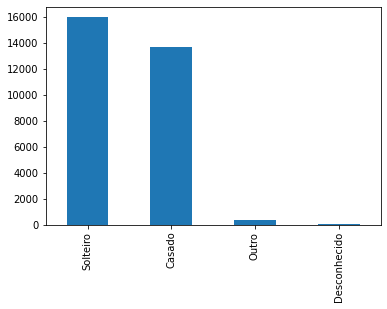

In [22]:
dic_temp = {1 : 'Casado', 2: "Solteiro", 3 : 'Outro', 0 : 'Desconhecido'}
dados_clientes.replace({"Estado_Civil": dic_temp}).Estado_Civil.value_counts().plot.bar()

In [23]:
# Convertendo a variável para o tipo fator com faixa etária

dados_clientes.Idade.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: Idade, dtype: int64

In [24]:
bins= [0,30,50,100]
labels = ['Jovem','Adulto','Idoso']
dados_clientes['Idade'] = pd.cut(dados_clientes['Idade'], bins=bins, labels=labels, right=False)

In [25]:
dados_clientes.head()

,LIMIT_BAL,Genero,Escolaridade,Estado_Civil,Idade,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,inadimplente
0,20000,2,2,1,Jovem,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,Jovem,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,Adulto,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,Adulto,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,Idoso,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
# Convertendo as variáveis que indicam pagamentos para o tipo fator

dados_clientes.PAY_0 = dados_clientes.PAY_0.astype('category')
dados_clientes.PAY_2 = dados_clientes.PAY_2.astype('category')
dados_clientes.PAY_3 = dados_clientes.PAY_3.astype('category')
dados_clientes.PAY_4 = dados_clientes.PAY_4.astype('category')
dados_clientes.PAY_5 = dados_clientes.PAY_5.astype('category')
dados_clientes.PAY_6 = dados_clientes.PAY_6.astype('category')

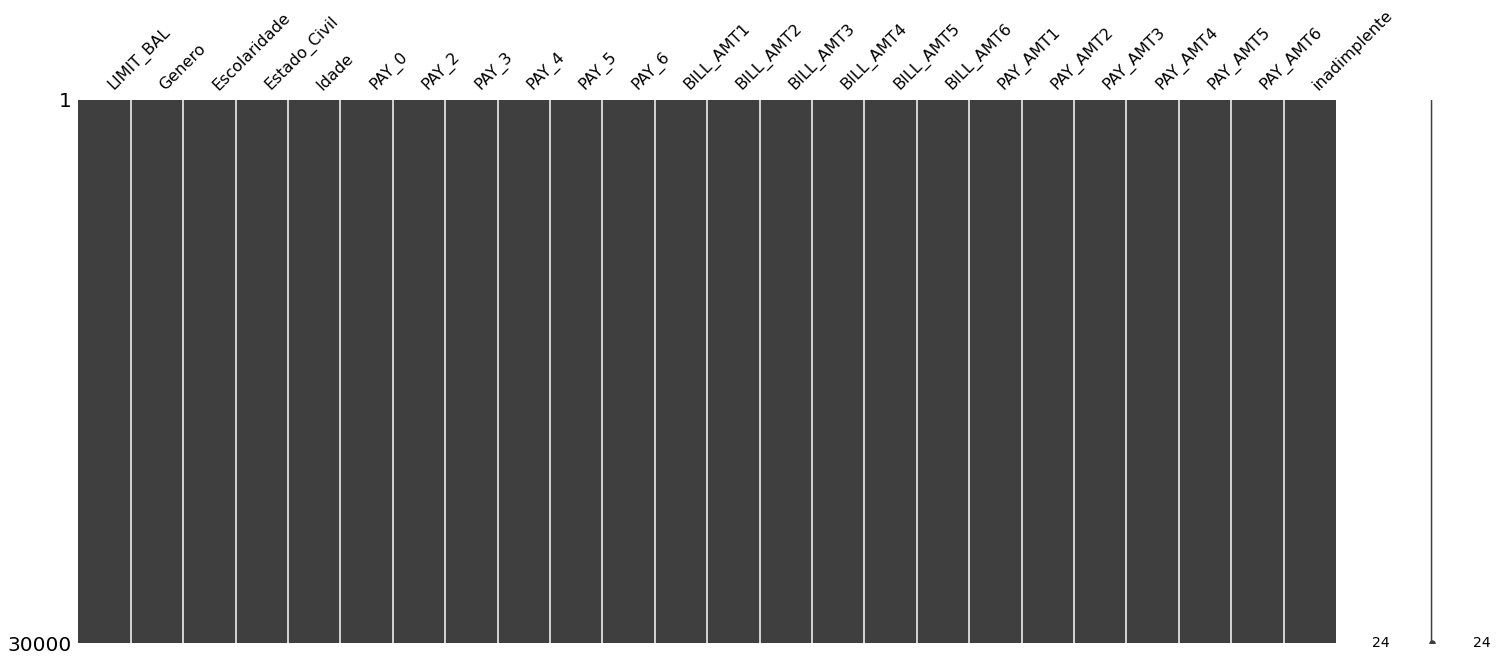

In [27]:
msno.matrix(dados_clientes)

In [28]:
dados_clientes.isnull().sum()

LIMIT_BAL       0
Genero          0
Escolaridade    0
Estado_Civil    0
Idade           0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
inadimplente    0
dtype: int64

In [29]:
# Alterando a variável dependente para o tipo fator

dados_clientes.inadimplente = dados_clientes.inadimplente.astype('category')

In [30]:
# Total de inadimplentes versus nÃo-inadimplentes

dados_clientes.inadimplente.value_counts()

0    23364
1     6636
Name: inadimplente, dtype: int64

In [31]:
# Vejamos as porcentagens entre as classes

dados_clientes.inadimplente.value_counts(normalize=True) * 100

0    77.88
1    22.12
Name: inadimplente, dtype: float64

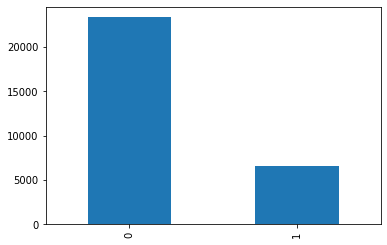

In [32]:
# Plot da distribuição

dados_clientes.inadimplente.value_counts().plot.bar()

In [33]:
# Amostragem estratificada. 
# Seleciona as linhas de acordo com a variável inadimplente como strata

from sklearn.model_selection import train_test_split

y = dados_clientes[['inadimplente']]
X = dados_clientes.drop('inadimplente', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [34]:
# Definimos os dados de treinamento como subconjunto do conjunto de dados original
# com números de indice de linha (conforme identificado acima) e todas as colunas

X_train.head()

,LIMIT_BAL,Genero,Escolaridade,Estado_Civil,Idade,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
27457,10000,1,2,1,Adulto,1,-1,-1,-1,-1,...,0,780,0,0,800,0,780,0,0,0
23789,20000,2,3,1,Idoso,1,-1,-1,-1,-2,...,340,-50,-830,-1660,780,340,0,0,0,0
19876,50000,2,2,2,Adulto,0,0,-1,0,0,...,10812,12237,13057,15057,3000,15000,2000,2000,2000,0
29530,100000,1,2,1,Adulto,0,-1,-1,-1,0,...,390,1170,780,780,390,390,1170,0,0,0
27711,230000,2,2,2,Jovem,0,0,2,0,0,...,59349,56418,52950,49439,6000,0,3000,2000,1500,3000


In [35]:
y_train.head()

,inadimplente
27457,1
23789,0
19876,0
29530,0
27711,0


In [36]:
# Veja as porcentagens entre as classes

y_train.value_counts(normalize=True) * 100

inadimplente
0               77.093333
1               22.906667
dtype: float64

In [37]:
# Número de registros no dataset de treinamento

X_train.shape

(7500, 23)

In [39]:
# Comparamos as porcentagens entre as classes de treinamento e dados originais

print("Dados de treino")
print(y_train.value_counts(normalize=True) * 100)
print('------------------------------------------')
print("Dados originais")
print(dados_clientes.inadimplente.value_counts(normalize=True) * 100)

Dados de treino
inadimplente
0               77.093333
1               22.906667
dtype: float64
------------------------------------------
Dados originais
0    77.88
1    22.12
Name: inadimplente, dtype: float64


In [40]:
melt_compara_dados = (y_train.value_counts(normalize=True) * 100).rename_axis('Inadimplente').reset_index(name='Quantidade')
melt_compara_dados['tipo_dados'] = 'Treinamento'

melt_compara_dados_temp = (dados_clientes.inadimplente.value_counts(normalize=True) * 100).rename_axis('Inadimplente').reset_index(name='Quantidade')
melt_compara_dados_temp['tipo_dados'] = 'Original'
melt_compara_dados = melt_compara_dados.append(melt_compara_dados_temp)

In [41]:
melt_compara_dados

,Inadimplente,Quantidade,tipo_dados
0,0,77.093333,Treinamento
1,1,22.906667,Treinamento
0,0,77.880000,Original
1,1,22.120000,Original


In [42]:
# Melt Data - Converte colunas em linhas

melt_compara_dados = melt_compara_dados.melt(id_vars=['tipo_dados', 'Inadimplente'], var_name='Valor', value_name='Quantidade')
melt_compara_dados.drop(columns=['Valor'], inplace=True)
melt_compara_dados = melt_compara_dados[['Inadimplente', 'tipo_dados', 'Quantidade']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
melt_compara_dados

,Inadimplente,tipo_dados,Quantidade
0,0,Treinamento,77.093333
1,1,Treinamento,22.906667
2,0,Original,77.880000
3,1,Original,22.120000


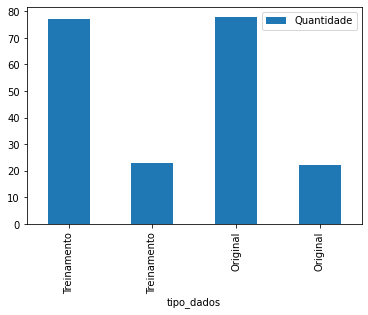

In [44]:
melt_compara_dados.plot(x="tipo_dados", y=["Quantidade", "Inadimplente"], kind="bar")

In [45]:
# Fazendo One-Hot encoding na variável Idade.

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(X_train[['Idade']])
X_train['Idade'] = ordinal_encoder.transform(X_train[['Idade']])

X_test['Idade'] = ordinal_encoder.transform(X_test[['Idade']])

In [46]:
X_train.head()

,LIMIT_BAL,Genero,Escolaridade,Estado_Civil,Idade,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
27457,10000,1,2,1,0.0,1,-1,-1,-1,-1,...,0,780,0,0,800,0,780,0,0,0
23789,20000,2,3,1,1.0,1,-1,-1,-1,-2,...,340,-50,-830,-1660,780,340,0,0,0,0
19876,50000,2,2,2,0.0,0,0,-1,0,0,...,10812,12237,13057,15057,3000,15000,2000,2000,2000,0
29530,100000,1,2,1,0.0,0,-1,-1,-1,0,...,390,1170,780,780,390,390,1170,0,0,0
27711,230000,2,2,2,2.0,0,0,2,0,0,...,59349,56418,52950,49439,6000,0,3000,2000,1500,3000


#################### Modelo de Machine Learning ####################

Construindo a primeira versão do modelo

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [48]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [49]:
prevs = clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prevs)

0.8132444444444444

In [51]:
# Matriz de confusão

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prevs)

array([[16455,  1127],
       [ 3075,  1843]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


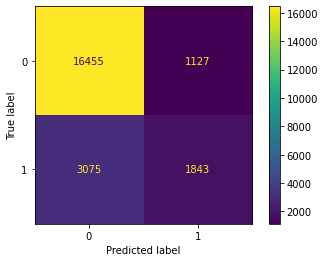

In [52]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

Na label 1 tivemos mais previsões erradas. O modelo previu 3075 como sendo label 0 enquanto somente 1843 como label 1.

In [53]:
# Calculando Precision.
from sklearn.metrics import precision_score

precision_score(y_test, prevs)

0.6205387205387205

In [54]:
# Calculando Recall.
from sklearn.metrics import recall_score

recall_score(y_test, prevs)

0.3747458316388776

In [55]:
# Calculando F1-Score.

from sklearn.metrics import f1_score

f1_score(y_test, prevs)

0.46729208924949284

# Balanceamento dos dados e criação do segundo modelo.

In [64]:
# Vamos começar escalonando os dados.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Balanceamento de classe
# Aplicando o SMOTE - SMOTE: Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train_scaled, y_train)

In [66]:
print("Dados balanceados")
print(y_train_resampled.value_counts(normalize=True) * 100)
print('------------------------------------------')
print("Dados antes de aplicar o SMOTE")
print(y_train.value_counts(normalize=True) * 100)

Dados balanceados
inadimplente
0               50.0
1               50.0
dtype: float64
------------------------------------------
Dados antes de aplicar o SMOTE
inadimplente
0               77.093333
1               22.906667
dtype: float64


In [69]:
clf2 = RandomForestClassifier()

clf2.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [70]:
# Avaliando o modelo 2.

prevs2 = clf2.predict(X_test_scaled)

In [71]:
accuracy_score(y_test, prevs2)

0.7948

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


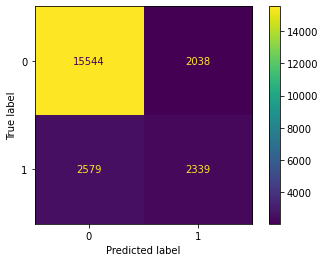

In [72]:
# Matriz de confusão

plot_confusion_matrix(clf2, X_test_scaled, y_test)
plt.show()

In [98]:
# Calculando Precision, recall e f1-score.
print('Precision: ')
print(precision_score(y_test, prevs2))
print('')
print('Recall: ')
print(recall_score(y_test, prevs2))
print('')
print('F1-score: ')
print(f1_score(y_test, prevs2))

Precision: 
0.5343842814713274

Recall: 
0.47559983733224886

F1-score: 
0.5032813340505647


In [74]:
#Importância das variáveis preditoras para as previsões
importance = clf2.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.07616
Feature: 1, Score: 0.01097
Feature: 2, Score: 0.03597
Feature: 3, Score: 0.01525
Feature: 4, Score: 0.01558
Feature: 5, Score: 0.09581
Feature: 6, Score: 0.06135
Feature: 7, Score: 0.03824
Feature: 8, Score: 0.02888
Feature: 9, Score: 0.02914
Feature: 10, Score: 0.02528
Feature: 11, Score: 0.05330
Feature: 12, Score: 0.04755
Feature: 13, Score: 0.04497
Feature: 14, Score: 0.04321
Feature: 15, Score: 0.04392
Feature: 16, Score: 0.04488
Feature: 17, Score: 0.05409
Feature: 18, Score: 0.04983
Feature: 19, Score: 0.04754
Feature: 20, Score: 0.04611
Feature: 21, Score: 0.04201
Feature: 22, Score: 0.04996


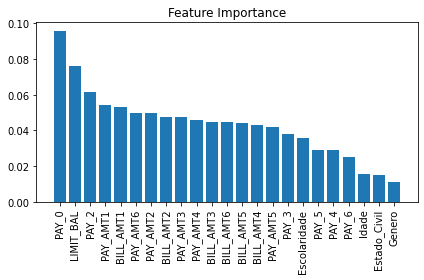

In [86]:
# Visualizando a importância das variáveis.
sorted_indices = np.argsort(importance)[::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Construindo a terceira versão do modelo apenas com as variáveis mais importantes

In [91]:
X_train_more_imp = X_train.drop(['Genero', 'Estado_Civil', 'Idade', 'PAY_6', 'PAY_4', 'PAY_5', 'Escolaridade'], axis=1)

In [92]:
clf3 = RandomForestClassifier()

clf3.fit(X_train_more_imp, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [95]:
# Avaliando o modelo

X_test_more_imp = X_test.drop(['Genero', 'Estado_Civil', 'Idade', 'PAY_6', 'PAY_4', 'PAY_5', 'Escolaridade'], axis=1)

prevs3 = clf3.predict(X_test_more_imp)

In [96]:
accuracy_score(y_test, prevs3)

0.8104

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


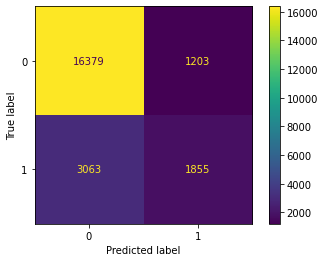

In [97]:
# Matriz de confusão

plot_confusion_matrix(clf3, X_test_more_imp, y_test)
plt.show()

In [99]:
# Calculando Precision, recall e f1-score.
print('Precision: ')
print(precision_score(y_test, prevs3))
print('')
print('Recall: ')
print(recall_score(y_test, prevs3))
print('')
print('F1-score: ')
print(f1_score(y_test, prevs3))

Precision: 
0.6066056245912361

Recall: 
0.3771858479056527

F1-score: 
0.4651454363089268


Não conseguimos um modelo bom mesmo com todas essas alterações.

No futuro iremos criar um novo notebook explorando mais situações e aplicando novas transformações nos dados.

Pretendemos com isso criar um modelo que possa ser utilizado de forma mais segura para previsão dos pagamentos das faturas.